In [1]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import os
import cv2
from PIL import Image
import random
from matplotlib.colors import ListedColormap 

In [2]:
def copy_files(src_path,dest_path):
    files=os.listdir(src_path)
    while True:
        if len(os.listdir(dest_path))>=412:
            break
        i=random.randint(0,len(os.listdir(src_path))-1)
        img_file=files[i]
        img_path=os.path.join(src_path,img_file)
        img=cv2.imread(img_path)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=Image.fromarray(img)
        frame_draw=img.copy()
        frame=img.resize((100,100), Image.BILINEAR)
        img_dest_path=os.path.join(dest_path,img_file)
        frame.save(img_dest_path)

In [3]:
path1=r'C:\Users\occisor\Downloads\Engagement_recognition\wacv2016-master\1'
path2=r'C:\Users\occisor\Downloads\Engagement_recognition\wacv2016-master\2'
path3=r'C:\Users\occisor\Downloads\Engagement_recognition\wacv2016-master\3'
dest_path1=r'C:\Users\occisor\Downloads\Engagement_recognition\wacv2016-master\dataset\1'
dest_path2=r'C:\Users\occisor\Downloads\Engagement_recognition\wacv2016-master\dataset\2'
dest_path3=r'C:\Users\occisor\Downloads\Engagement_recognition\wacv2016-master\dataset\3'

copy_files(path1,dest_path1)
copy_files(path2,dest_path2)
copy_files(path3,dest_path3)

In [4]:
dest_path_dir=[dest_path1,dest_path2,dest_path3]

In [5]:
X=[]
Y=[]
label=0
for path in dest_path_dir:
    files=os.listdir(path)
    for i,img in enumerate(files):
        img_path=os.path.join(path,img)
        img=cv2.imread(img_path)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=img.reshape(1,img.shape[0]*img.shape[1]*img.shape[2])
        X.append(img)
        Y.append(label)
    label+=1

In [6]:
X=np.asarray(X)

In [7]:
X=X.reshape(1236,30000)

In [8]:
X=pd.DataFrame(X)

In [9]:
Y=np.asarray(Y)

In [10]:
Y=Y.reshape(1236,1)

In [11]:
Y=pd.DataFrame(Y)

In [12]:
Y = Y.loc[:].values

In [13]:
X = X.loc[:].values

In [14]:
X = StandardScaler().fit_transform(X)

In [15]:
pca = PCA(n_components=2)

In [16]:
principalComponents = pca.fit_transform(X)

In [17]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [18]:
Y=pd.DataFrame(Y)

In [19]:
finalDf = pd.concat([principalDf,Y], axis = 1)

In [20]:
finalDf.columns = ['principal component 1','principal component 2','target']

In [21]:
finalDf

,principal component 1,principal component 2,target
0,-86.480874,4.482743,0
1,-26.884702,-21.304243,0
2,-58.044220,-2.908645,0
3,-63.409057,-13.049018,0
4,-50.091160,-0.119582,0
...,...,...,...
1231,-113.606161,-7.923692,2
1232,-162.533278,12.040967,2
1233,-15.541359,156.401991,2
1234,-29.879802,146.073110,2


In [22]:
for i in range(len(finalDf)):
    if finalDf['target'][i]==0:
        finalDf['target'][i]='disengaged'
    if finalDf['target'][i]==1:
        finalDf['target'][i]='partially_disengaged'
    if finalDf['target'][i]==2:
        finalDf['target'][i]='engaged'

D:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

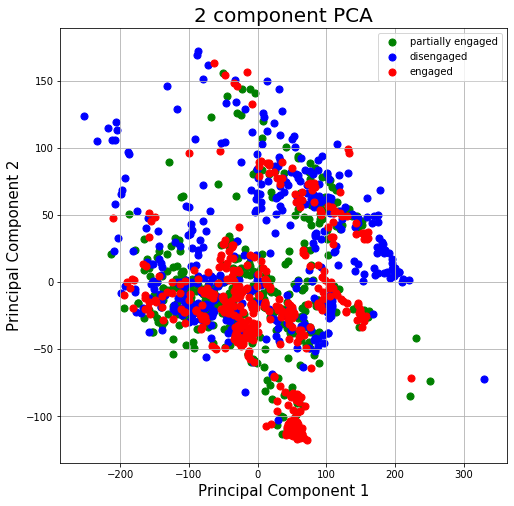

In [25]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['disengaged','partially_disengaged','engaged' ]
colors = ['g']
ax.scatter(finalDf.loc[412:823, 'principal component 1']
               , finalDf.loc[412:823, 'principal component 2']
               , c ='green' 
               , s = 50)
ax.scatter(finalDf.loc[0:411, 'principal component 1']
               , finalDf.loc[0:411, 'principal component 2']
               , c ='blue' 
               , s = 50)
ax.scatter(finalDf.loc[824:1235, 'principal component 1']
               , finalDf.loc[824:1235, 'principal component 2']
               , c ='red' 
               , s = 50)
ax.legend(['partially engaged','disengaged','engaged'])
ax.grid()